### Programming a simulator of a level control system in Python; Course: FM1220-120H Automatic Control; Dhanush Wagle, M.Sc EPE, 238810

## Wood Chip Tank

The starting point of the following tasks is this simulator of the chip tank (no controller is included in the simulator): sim_chiptank.py. The process model is as presented in Ch. 36.1 in the document Process ModelsPreview the document, but with the following difference: The control signal u [kg/s] sets the flow through feed screw (no feed screw gain is included in the simulator).

![Wood Chip Tank](figure.jpg)

The nominal wood-chip level setpoint is 10 m. The nominal wood-chip outflow (disturbance) is 25 kg/s. The maximum control signal is 50 kg/s, and the minimum is 0 kg/s (the control signal should should . The maximum level is 15 m, and the minimum is 0 m.

![Variables and parameters](table.jpg)

![Block Diagram of the wood chip tank](block.jpg)

![Model Equation](equation.jpg)

## TASK

#### 1. Implementation of a P (proportional) level controller:

a. Enhance the simulator with a P controller including a manual control term, u_man, with an appriorpate value. (You may put the controller before (above) the process simulator in the simulation loop.) The setpoint should be plotted together with the process variable (level).

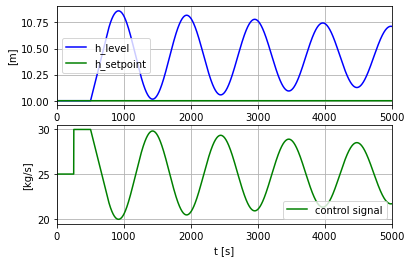

In [2]:
# %% Import

import matplotlib.pyplot as plt
import numpy as np

# %% Time settings:

ts = 1  # Time-step [s]
t_start = 0.0  # [s]
t_stop = 5000.0  # [s]
N_sim = int((t_stop-t_start)/ts) + 1

# %% Process params:

rho = 145  # [kg/m^3]
A = 13.4  # [m^2]
t_delay = 250.0  # [s]
h_min = 0  # [m]
h_max = 15  # [m]
u_min = 0 # [kg/s]
u_max = 50 # [kg/s]

# %% Initialization of time delay:

u_delayed_init = 25  # [kg/s]
N_delay = int(round(t_delay/ts)) + 1
delay_array = np.zeros(N_delay) + u_delayed_init

# %% Arrays for plotting:

t_array = np.zeros(N_sim)
h_array = np.zeros(N_sim)
u_array = np.zeros(N_sim)
h_sp_array = np.zeros(N_sim)

# %% Initial state:

h_k = 10.0  # m setpoint
h_sp = h_k # just for graph
h_kp1 = 10.0 # m initializing only
k_pu = 26 # from labview simulation

# %% Simulation for-loop:

for k in range(0, N_sim):

    t_k = k*ts

    if t_k <= 250:
        u_man = 25  # kg/s
        w_out_k = 25  # kg/s
    else:
        u_man = 30  # kg/s
        w_out_k = 25  # kg/s
   
    # PID Tuning with the Ziegler-Nichols
    
    k_p = 0.45*k_pu
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_k = u_man + u_p_k # total control signal
    u_k = np.clip(u_k, u_min, u_max)
    
    # Time delay:
    u_delayed_k = delay_array[-1]
    delay_array[1:] = delay_array[0:-1]
    delay_array[0] = u_k

    # Euler-forward integration (Euler step):
    w_in_k = u_delayed_k  # kg/s
    dh_dt_k = (1/(rho*A))*(w_in_k - w_out_k)
    h_kp1 = h_k + ts*dh_dt_k
    h_kp1 = np.clip(h_kp1, h_min, h_max)

    # Storage for plotting:
    t_array[k] = t_k
    u_array[k] = u_k
    h_array[k] = h_k
    h_sp_array[k] = h_sp
    
    # Time shift:
    h_k = h_kp1

# %% Plotting:

plt.close('all')
plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(t_array, h_array, 'b', label='h_level')
plt.plot(t_array, h_sp_array, 'g', label='h_setpoint')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[m]')

plt.subplot(2, 1, 2)
plt.plot(t_array, u_array, 'g', label='control signal')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[kg/s]')

plt.show()

b. Tune the P controller with the Ziegler-Nichols method. Is the stability of the control system acceptable with the P controller?

Ans: The model was tuned with the P controller with the Ziegler-Nichols method as:
```python
    k_p = 0.45*k_pu
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_k = u_man + u_p_k # total control signal
    u_k = np.clip(u_k, u_min, u_max)
```
From the figure above it is clear that the stability of the control system is not acceptable with the P controller.

c. What is the steady-state control error if the outflow changes from 25 to 30 kg/s?

In [7]:
for k in range(0, N_sim):

    t_k = k*ts

    if t_k <= 250:
        u_man = 25  # kg/s
        w_out_k = 30  # kg/s
    else:
        u_man = 30  # kg/s
        w_out_k = 30  # kg/s
   
    # PID Tuning with the Ziegler-Nichols
    
    k_p = 0.45*k_pu
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_k = u_man + u_p_k # total control signal
    u_k = np.clip(u_k, u_min, u_max)
    
    # Time delay:
    u_delayed_k = delay_array[-1]
    delay_array[1:] = delay_array[0:-1]
    delay_array[0] = u_k

    # Euler-forward integration (Euler step):
    w_in_k = u_delayed_k  # kg/s
    dh_dt_k = (1/(rho*A))*(w_in_k - w_out_k)
    h_kp1 = h_k + ts*dh_dt_k
    h_kp1 = np.clip(h_kp1, h_min, h_max)

    # Storage for plotting:
    t_array[k] = t_k
    u_array[k] = u_k
    h_array[k] = h_k
    h_sp_array[k] = h_sp
    
    # Time shift:
    h_k = h_kp1

# %% Printing control error

print('The control error is: ', e_k)

The control error is:  -0.5753475930068248


#### 2. Implementation of a PI level controller:

a. Implement a PI controller instead of the P controller. The controller should have anti windup (you can limit the integral term between u_max and u_min using the numpy clip() function).

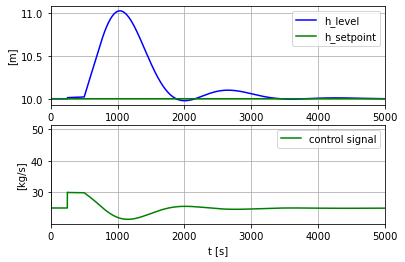

In [13]:
# %% Import

import matplotlib.pyplot as plt
import numpy as np

# %% Time settings:

ts = 1  # Time-step [s]
t_start = 0.0  # [s]
t_stop = 5000.0  # [s]
N_sim = int((t_stop-t_start)/ts) + 1

# %% Process params:

rho = 145  # [kg/m^3]
A = 13.4  # [m^2]
t_delay = 250.0  # [s]
h_min = 0  # [m]
h_max = 15  # [m]
u_min = 0 # [kg/s]
u_max = 50 # [kg/s]

# %% Initialization of time delay:

u_delayed_init = 25  # [kg/s]
N_delay = int(round(t_delay/ts)) + 1
delay_array = np.zeros(N_delay) + u_delayed_init

# %% Arrays for plotting:

t_array = np.zeros(N_sim)
h_array = np.zeros(N_sim)
u_array = np.zeros(N_sim)
h_sp_array = np.zeros(N_sim)


# %% Initial state:

h_k = 10.0  # m setpoint
h_sp = h_k # just for graph
h_kp1 = 0.0 # m initializing only
u_i_k = 0

# %% Simulation for-loop:

for k in range(0, N_sim):

    t_k = k*ts

    if t_k <= 250:
        u_man = 25  # kg/s
        w_out_k = 25  # kg/s
    else:
        u_man = 30  # kg/s
        w_out_k = 25  # kg/s
   
    # PID Tuning with the Skogested Method
    
    k_p = 6
    ti = 1000
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_i_k = u_i_k + ((k_p*ts)/ti)*e_k
    u_k = u_man + u_p_k + u_i_k# total control signal
    u_k = np.clip(u_k, u_min, u_max)
    
    # Time delay:
    u_delayed_k = delay_array[-1]
    delay_array[1:] = delay_array[0:-1]
    delay_array[0] = u_k

    # Euler-forward integration (Euler step):
    w_in_k = u_delayed_k  # kg/s
    dh_dt_k = (1/(rho*A))*(w_in_k - w_out_k)
    h_kp1 = h_k + ts*dh_dt_k
    h_kp1 = np.clip(h_kp1, h_min, h_max)

    # Storage for plotting:
    t_array[k] = t_k
    u_array[k] = u_k
    h_array[k] = h_k
    h_sp_array[k] = h_sp
    
    # Time shift:
    h_k = h_kp1

# %% Plotting:

plt.close('all')
plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(t_array, h_array, 'b', label='h_level')
plt.plot(t_array, h_sp_array, 'g', label='h_setpoint')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[m]')

plt.subplot(2, 1, 2)
plt.plot(t_array, u_array, 'g', label='control signal')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[kg/s]')

plt.show()

b. Tune the PI controller with the Skogestad method. Is the stability of the control system acceptable with the PI controller?

Ans: The model was tuned with the PI controller with the Ziegler-Nichols method as:
```python
    k_p = 6
    ti = 750
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_i_k = u_i_k + ((k_p*ts)/ti)*e_k
    u_k = u_man + u_p_k + u_i_k# total control signal
    u_k = np.clip(u_k, u_min, u_max)
```
From the figure above it is clear that the stability of the control system is acceptable with the PI controller.

c. What is the steady-state control error if the outflow changes from 25 to 30 kg/s?

In [12]:
for k in range(0, N_sim):

    t_k = k*ts

    if t_k <= 250:
        u_man = 25  # kg/s
        w_out_k = 30  # kg/s
    else:
        u_man = 30  # kg/s
        w_out_k = 30  # kg/s
   
    # PID Tuning with the Ziegler-Nichols
    
    k_p = 6
    ti = 1000
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_i_k = u_i_k + ((k_p*ts)/ti)*e_k
    u_k = u_man + u_p_k + u_i_k# total control signal
    u_k = np.clip(u_k, u_min, u_max)
    
    # Time delay:
    u_delayed_k = delay_array[-1]
    delay_array[1:] = delay_array[0:-1]
    delay_array[0] = u_k

    # Euler-forward integration (Euler step):
    w_in_k = u_delayed_k  # kg/s
    dh_dt_k = (1/(rho*A))*(w_in_k - w_out_k)
    h_kp1 = h_k + ts*dh_dt_k
    h_kp1 = np.clip(h_kp1, h_min, h_max)

    # Storage for plotting:
    t_array[k] = t_k
    u_array[k] = u_k
    h_array[k] = h_k
    h_sp_array[k] = h_sp
    
    # Time shift:
    h_k = h_kp1

# %% Printing control error

print('The control error is: ', e_k)

The control error is:  -0.0005846509360605268


#### 3. Stability of the control system: Assume PI control.

a. Demonstrate that the control system becomes unstable if the time-delay in the control loop is too large (which may be due to a reduction of the conveyor belt speed). Specifically: Which time-delay makes the control system marginally stable (oscillatory with no damping)?

The control error is:  -5.0


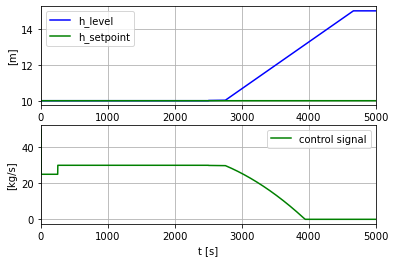

In [14]:
# %% Time settings:

ts = 1  # Time-step [s]
t_start = 0.0  # [s]
t_stop = 5000.0  # [s]
N_sim = int((t_stop-t_start)/ts) + 1

# %% Process params:

rho = 145  # [kg/m^3]
A = 13.4  # [m^2]
t_delay = 2500.0  # [s]
h_min = 0  # [m]
h_max = 15  # [m]
u_min = 0 # [kg/s]
u_max = 50 # [kg/s]

# %% Initialization of time delay:

u_delayed_init = 25  # [kg/s]
N_delay = int(round(t_delay/ts)) + 1
delay_array = np.zeros(N_delay) + u_delayed_init

# %% Arrays for plotting:

t_array = np.zeros(N_sim)
h_array = np.zeros(N_sim)
u_array = np.zeros(N_sim)
h_sp_array = np.zeros(N_sim)


# %% Initial state:

h_k = 10.0  # m setpoint
h_sp = h_k # just for graph
h_kp1 = 0.0 # m initializing only
u_i_k = 0

# %% Simulation for-loop:

for k in range(0, N_sim):

    t_k = k*ts

    if t_k <= 250:
        u_man = 25  # kg/s
        w_out_k = 25  # kg/s
    else:
        u_man = 30  # kg/s
        w_out_k = 25  # kg/s
   
    # PID Tuning with the Ziegler-Nichols
    
    k_p = 6
    ti = 1000
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_i_k = u_i_k + ((k_p*ts)/ti)*e_k
    u_k = u_man + u_p_k + u_i_k# total control signal
    u_k = np.clip(u_k, u_min, u_max)
    
    # Time delay:
    u_delayed_k = delay_array[-1]
    delay_array[1:] = delay_array[0:-1]
    delay_array[0] = u_k

    # Euler-forward integration (Euler step):
    w_in_k = u_delayed_k  # kg/s
    dh_dt_k = (1/(rho*A))*(w_in_k - w_out_k)
    h_kp1 = h_k + ts*dh_dt_k
    h_kp1 = np.clip(h_kp1, h_min, h_max)

    # Storage for plotting:
    t_array[k] = t_k
    u_array[k] = u_k
    h_array[k] = h_k
    h_sp_array[k] = h_sp
    
    # Time shift:
    h_k = h_kp1

# %% Printing control error

print('The control error is: ', e_k)

# %% Plotting:

plt.close('all')
plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(t_array, h_array, 'b', label='h_level')
plt.plot(t_array, h_sp_array, 'g', label='h_setpoint')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[m]')

plt.subplot(2, 1, 2)
plt.plot(t_array, u_array, 'g', label='control signal')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[kg/s]')

plt.show()

The figure above clerly represents that the control erros is 5 which means the system is unstable or there is no damping in the system.

If we set time delay to 400s, it makes the control system marginally stable (oscillatory with no damping)

The control error is:  -0.7565905403122137


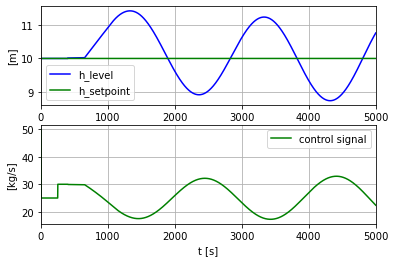

In [4]:
# %% Time settings:

ts = 1  # Time-step [s]
t_start = 0.0  # [s]
t_stop = 5000.0  # [s]
N_sim = int((t_stop-t_start)/ts) + 1

# %% Process params:

rho = 145  # [kg/m^3]
A = 13.4  # [m^2]
t_delay = 400  # [s]
h_min = 0  # [m]
h_max = 15  # [m]
u_min = 0 # [kg/s]
u_max = 50 # [kg/s]

# %% Initialization of time delay:

u_delayed_init = 25  # [kg/s]
N_delay = int(round(t_delay/ts)) + 1
delay_array = np.zeros(N_delay) + u_delayed_init

# %% Arrays for plotting:

t_array = np.zeros(N_sim)
h_array = np.zeros(N_sim)
u_array = np.zeros(N_sim)
h_sp_array = np.zeros(N_sim)


# %% Initial state:

h_k = 10.0  # m setpoint
h_sp = h_k # just for graph
h_kp1 = 0.0 # m initializing only
u_i_k = 0

# %% Simulation for-loop:

for k in range(0, N_sim):

    t_k = k*ts

    if t_k <= 250:
        u_man = 25  # kg/s
        w_out_k = 25  # kg/s
    else:
        u_man = 30  # kg/s
        w_out_k = 25  # kg/s
   
    # PID Tuning with the Ziegler-Nichols
    
    k_p = 6
    ti = 1000
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_i_k = u_i_k + ((k_p*ts)/ti)*e_k
    u_k = u_man + u_p_k + u_i_k# total control signal
    u_k = np.clip(u_k, u_min, u_max)
    
    # Time delay:
    u_delayed_k = delay_array[-1]
    delay_array[1:] = delay_array[0:-1]
    delay_array[0] = u_k

    # Euler-forward integration (Euler step):
    w_in_k = u_delayed_k  # kg/s
    dh_dt_k = (1/(rho*A))*(w_in_k - w_out_k)
    h_kp1 = h_k + ts*dh_dt_k
    h_kp1 = np.clip(h_kp1, h_min, h_max)

    # Storage for plotting:
    t_array[k] = t_k
    u_array[k] = u_k
    h_array[k] = h_k
    h_sp_array[k] = h_sp
    
    # Time shift:
    h_k = h_kp1

# %% Printing control error

print('The control error is: ', e_k)

# %% Plotting:

plt.close('all')
plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(t_array, h_array, 'b', label='h_level')
plt.plot(t_array, h_sp_array, 'g', label='h_setpoint')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[m]')

plt.subplot(2, 1, 2)
plt.plot(t_array, u_array, 'g', label='control signal')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[kg/s]')

plt.show()

b. Demonstrate that the control system becomes unstable if the cross-sectional area of the tank is too small (in general, the area may decrease if the walls are not straight). Specifically: Which area value makes the control system marginally stable (oscillatory with no damping)?

The control error is:  0.945915554908277


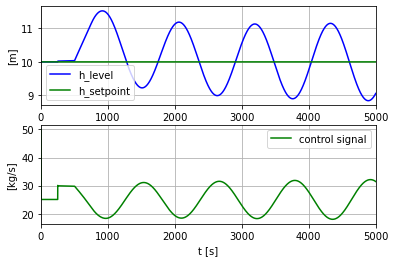

In [17]:
# %% Time settings:

ts = 1  # Time-step [s]
t_start = 0.0  # [s]
t_stop = 5000.0  # [s]
N_sim = int((t_stop-t_start)/ts) + 1

# %% Process params:

rho = 145  # [kg/m^3]
A = 7.5  # [m^2]
t_delay = 250.0  # [s]
h_min = 0  # [m]
h_max = 15  # [m]
u_min = 0 # [kg/s]
u_max = 50 # [kg/s]

# %% Initialization of time delay:

u_delayed_init = 25  # [kg/s]
N_delay = int(round(t_delay/ts)) + 1
delay_array = np.zeros(N_delay) + u_delayed_init

# %% Arrays for plotting:

t_array = np.zeros(N_sim)
h_array = np.zeros(N_sim)
u_array = np.zeros(N_sim)
h_sp_array = np.zeros(N_sim)


# %% Initial state:

h_k = 10.0  # m setpoint
h_sp = h_k # just for graph
h_kp1 = 0.0 # m initializing only
u_i_k = 0

# %% Simulation for-loop:

for k in range(0, N_sim):

    t_k = k*ts

    if t_k <= 250:
        u_man = 25  # kg/s
        w_out_k = 25  # kg/s
    else:
        u_man = 30  # kg/s
        w_out_k = 25  # kg/s
   
    # PID Tuning with the Ziegler-Nichols
    
    k_p = 6
    ti = 1000
    e_k = h_sp - h_kp1 # control error
    u_p_k = k_p*e_k # p-term
    u_i_k = u_i_k + ((k_p*ts)/ti)*e_k
    u_k = u_man + u_p_k + u_i_k# total control signal
    u_k = np.clip(u_k, u_min, u_max)
    
    # Time delay:
    u_delayed_k = delay_array[-1]
    delay_array[1:] = delay_array[0:-1]
    delay_array[0] = u_k

    # Euler-forward integration (Euler step):
    w_in_k = u_delayed_k  # kg/s
    dh_dt_k = (1/(rho*A))*(w_in_k - w_out_k)
    h_kp1 = h_k + ts*dh_dt_k
    h_kp1 = np.clip(h_kp1, h_min, h_max)

    # Storage for plotting:
    t_array[k] = t_k
    u_array[k] = u_k
    h_array[k] = h_k
    h_sp_array[k] = h_sp
    
    # Time shift:
    h_k = h_kp1

# %% Printing control error

print('The control error is: ', e_k)

# %% Plotting:

plt.close('all')
plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(t_array, h_array, 'b', label='h_level')
plt.plot(t_array, h_sp_array, 'g', label='h_setpoint')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[m]')

plt.subplot(2, 1, 2)
plt.plot(t_array, u_array, 'g', label='control signal')
plt.legend()
plt.grid()
plt.xlim(t_start, t_stop)
plt.xlabel('t [s]')
plt.ylabel('[kg/s]')

plt.show()

If the area is 7.5 meter square then it gives oscillation with no damping.